# ChIP-Seq Peaks analysis
* Donor6
* Donor7
* Donor8

### Bowtie logs analysis

In [59]:
import os
import pandas as pd
import re

def bowtie_logs(folder):
    """Process bowtie logs processed by batch task"""
    # Here we rely on bowtie output
    READS = '.*reads processed: '
    REPORTED_ALIGNMENT = '.*reported alignment: '
    FAILED_TO_ALIGN = '.*failed to align: '
    SUPRESSED = '.*due to -m: '
    print('Processing bowtie logs', folder)
    df = pd.DataFrame(columns=['sample', 'reads', 'aligned', 'not_aligned', 'supressed'])
    for dirpath, dirs, files in os.walk(folder):
            for f in files:
                if ('bowtie' not in f or not re.search('.log$', f)):
                    continue
                reads = ''
                aligned = ''
                failed_to_align = ''
                supressed = ''
                for line in open(dirpath + '/' + f, 'r'):
                    if re.search(READS, line):
                         reads = re.sub(READS, '', line).strip()
                    if re.search(REPORTED_ALIGNMENT, line):
                         aligned = re.sub(REPORTED_ALIGNMENT, '', line).strip()
                    if re.search(FAILED_TO_ALIGN, line):
                        failed_to_align = re.sub(FAILED_TO_ALIGN, '', line).strip()
                    if re.search(SUPRESSED, line):
                         supressed = re.sub(SUPRESSED, '', line).strip()
                df.loc[len(df)] = (f, reads, aligned, failed_to_align, supressed)
    return df

BOWTIE_LOGS = '/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams'
bowtie_logs(BOWTIE_LOGS).to_csv(BOWTIE_LOGS + '/bowtie_report.csv', index=False)

Processing bowtie logs /mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams


In [30]:
%matplotlib inline
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def processvenn(file):
    df = pd.read_csv(file, sep='\t')
    donor6 = df.columns[5]
    donor7 = df.columns[6]
    donor8 = df.columns[7]
    fig = plt.figure(figsize=(4, 4))
    # (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    Abc = len(df[df.list == '1'])
    aBc = len(df[df.list == '2'])
    ABc = len(df[df.list == '1,2'])
    abC = len(df[df.list == '3'])
    AbC = len(df[df.list == '1,3'])
    aBC = len(df[df.list == '2,3'])
    ABC = len(df[df.list == '1,2,3'])
    venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels = (donor6, donor7, donor8))
    plt.show()

# MACS 0.1
Please ensure that you have created intersection data by calling
```
multiIntersectBed -header -i *k27ac*.bed > k27ac.csv
multiIntersectBed -header -i *k4me3*.bed > k4me3.csv
multiIntersectBed -header -i *k27me3*.bed > k27me3.csv
```



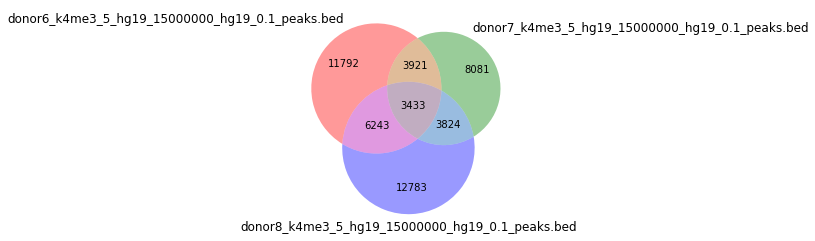

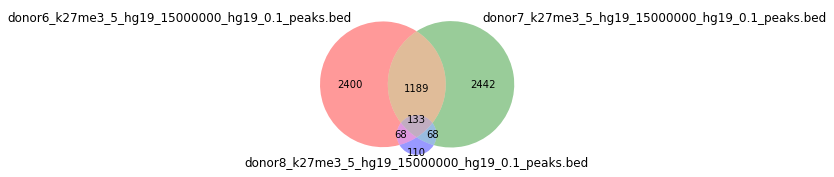

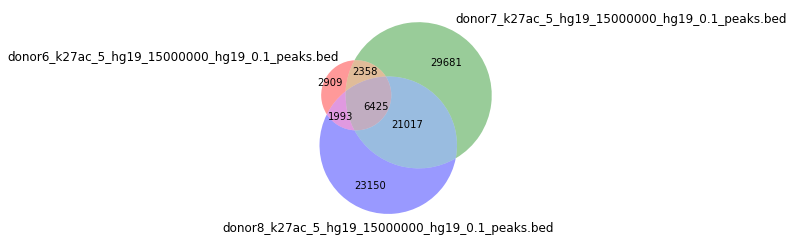

In [31]:
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k4me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k27me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k27ac.csv')

# MACS2 0.01

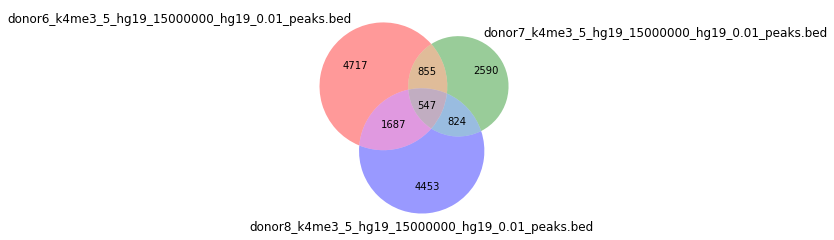

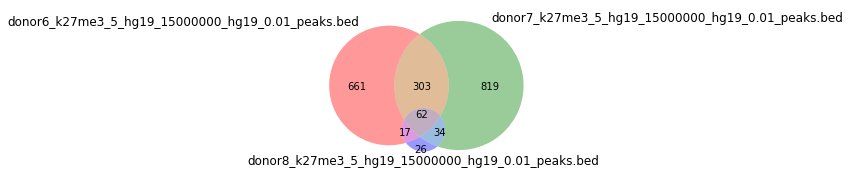

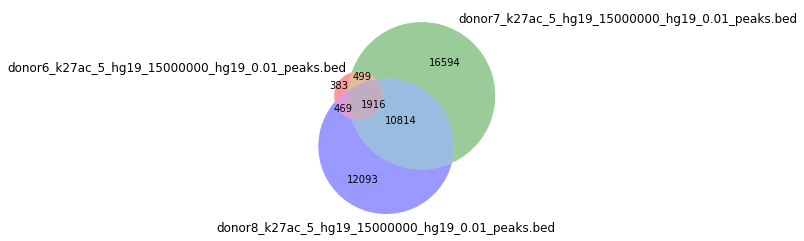

In [32]:
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k4me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27ac.csv')

# Zinbra 0.0001

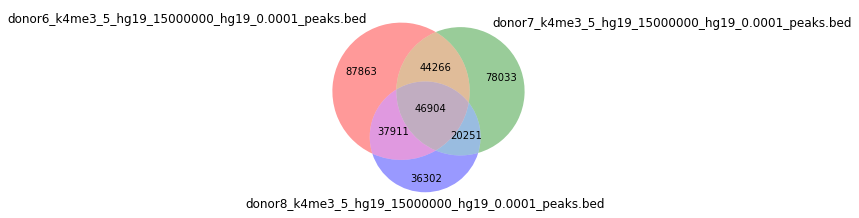

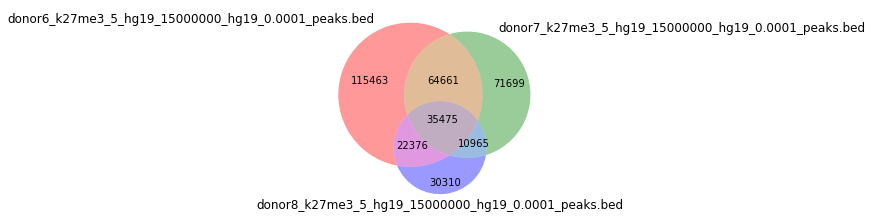

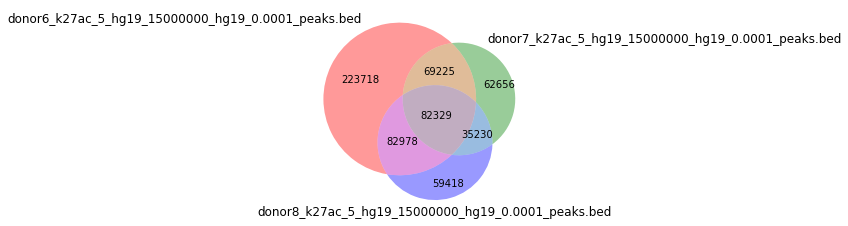

In [34]:
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k4me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k27me3.csv')
processvenn('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k27ac.csv')